In [1]:
import datetime
import os
from mdagent import MDAgent

In [2]:
prompt13 = "Compare the RMSF of 1UBQ under high pressure and low pressure. Perform the simulation for 1 ns, varying only the pressure. Plot the moments of inertia over time for both simulations."
llm_var = "accounts/fireworks/models/llama-v3p1-405b-instruct"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools)
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

date and time: 2024-08-19
time: 16:14:28
LLM:  accounts/fireworks/models/llama-v3p1-405b-instruct 
Temperature:  0.1


In [3]:
agent.run(prompt13)

Thought: First, I need to set up and run two simulations of 1UBQ, one at high pressure and one at low pressure, to obtain the trajectory files for RMSF calculation. I will use the SetUpandRunFunction tool to perform the simulations.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1UBQ",
    "forcefield_files": ["amber99sbildn.xml", "tip3p.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "PME",
      "nonbondedCutoff": "1.0 * nanometers",
      "constraints": "HBonds",
      "rigidWater": true,
      "constraintTolerance": "0.00001",
      "solvate": true
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "300 * kelvin",
      "Friction": "1.0 / picoseconds",
      "Timestep": "0.002 * picoseconds",
      "Pressure": "1000 * bar"
    },
    "simulation_params": {
      "Ensemble": "NPT",
      "Number of Steps": 500000,
      "record_interval_steps": 1000,
      "record_params": [

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [4]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)

registry = agent.path_registry
print(os.path.basename(registry.ckpt_dir))
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

date and time: 2024-08-19
time: 18:36:35
ckpt_94
Files found in registry: 1UBQ_161441: PDB file downloaded from RSCB
 PDBFile ID: 1UBQ_161441
 1UBQ_161452: Cleaned File:  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_161459: Initial positions for simulation sim0_161459
 sim0_161459: Basic Simulation of Protein 1UBQ_161452
 rec0_161500: Simulation trajectory for protein 1UBQ_161452 and simulation sim0_161459
 rec1_161500: Simulation state log for protein 1UBQ_161452 and simulation sim0_161459
 rec2_161500: Simulation pdb frames for protein 1UBQ_161452 and simulation sim0_161459
 top_sim0_172003: Initial positions for simulation sim0_172003
 sim0_172003: Basic Simulation of Protein 1UBQ_161452
 rec0_172004: Simulation trajectory for protein 1UBQ_161452 and simulation sim0_172003
 rec1_172004: Simulation state log for protein 1UBQ_161452 and simulation sim0_172003
 rec2_172004: Simulation pdb frames for protein 

In [5]:
import re
import os

matches = re.findall(r"fig0_\d+", paths_and_descriptions)
file_id1 = matches[0]
file_id2 = matches[1]
path1 = registry.get_mapped_path(file_id1)
path2 = registry.get_mapped_path(file_id2)
assert os.path.exists(path1), "Path does not exist"
assert os.path.exists(path2), "Path does not exist"
print(f"It's asserted that file paths for {file_id1} and {file_id2} exist")

It's asserted that file paths for fig0_183518 and fig0_183523 exist


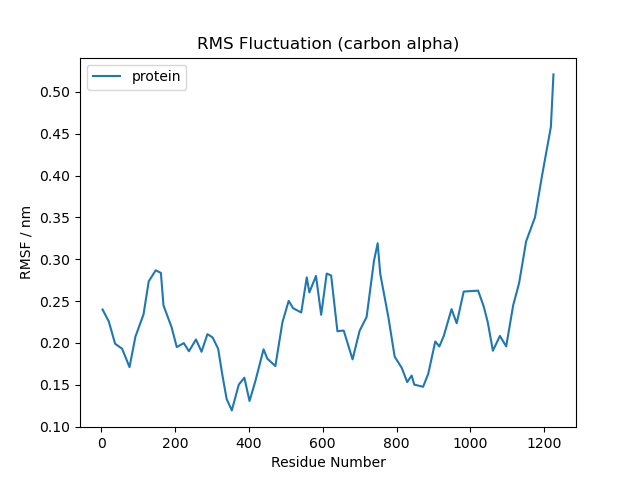

In [6]:
from IPython.display import Image

Image(filename=path1)

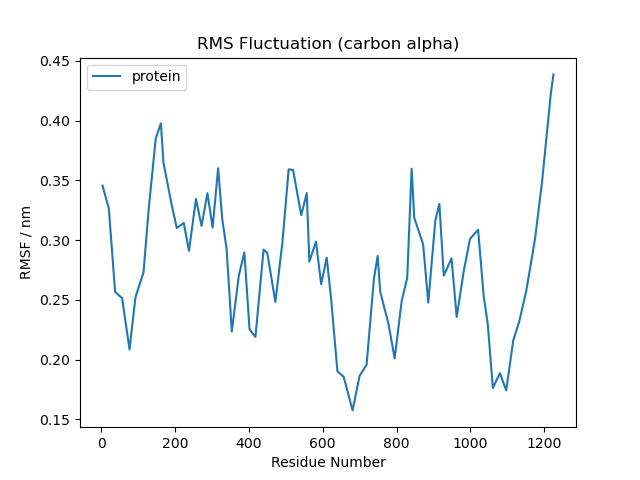

In [7]:
Image(filename=path2)

In [8]:
file_id1 = matches[3]
file_id2 = matches[4]
path1 = registry.get_mapped_path(file_id1)
path2 = registry.get_mapped_path(file_id2)
assert os.path.exists(path1), "Path does not exist"
assert os.path.exists(path2), "Path does not exist"
print(f"It's asserted that file paths for {file_id1} and {file_id2} exist")

It's asserted that file paths for fig0_183622 and fig0_183628 exist


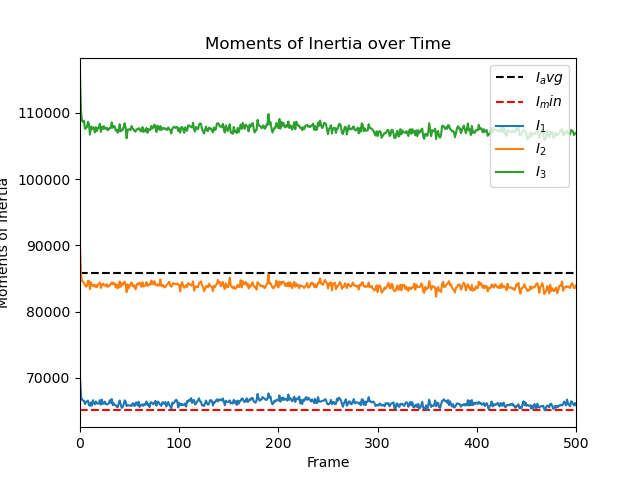

In [9]:
from IPython.display import Image

Image(filename=path1)

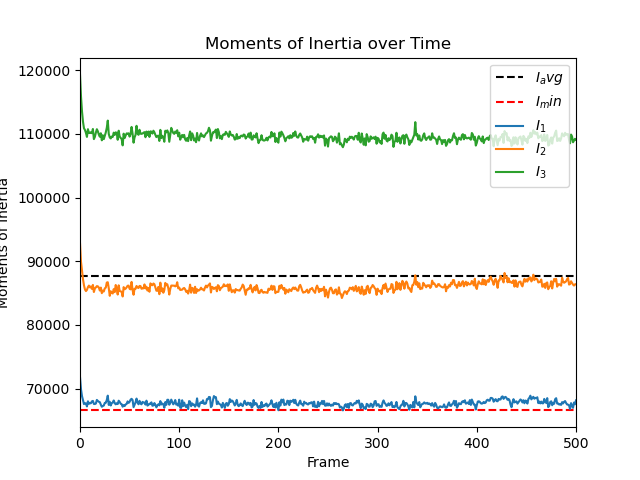

In [10]:
Image(filename=path2)

# Experiment Result: ✅❌

1. Completed without Exception or TimeOut Errors ✅
2. Attempted all necessary steps ✅
3. Completed without Hallucination ✅
4. Logic make sense ✅ (weakly yes)
5. Correct Answer ✅